# EDA

1. 전체적인 데이터 분석
- 분석의 목적과 목적에 맞는 변수가 무엇인지
- 데이터형 확인/데이터의 오류나 누락이 없는지
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 -> 아니라면 그 이유가 무엇인지 확인

2. 데이터의 개별 속성값 관찰
- 개별 데이터를 관찰하며 전체적인 추세와 특이사항 관찰
- 적절한 요약통계 지표 사용 (평균, 중앙값, 분산 등)
- 시각화를 통해 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정

3. 속성 간의 관계 분석
- 개별 속성 관찰에서 찾아내지 못했던 속성들의 조합, 패턴 발견
- 그래프를 통해 시각화하여 속성 간의 관계 분석
- 상관계수를 통한 상관관계 확인

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.csv').drop(columns=['ID'])
df = train.copy()
train_X = train.drop(columns=['y'])
train_y = train['y']

In [95]:
len(df)

40118

In [96]:
# import pandas as pd
# import numpy as np

# from imbens.sampler import ADASYN
# # Create a sample DataFrame (for demonstration purposes)
# np.random.seed(42)
# df = pd.DataFrame({
#     'feature1': np.random.randn(100),
#     'feature2': np.random.randn(100),
#     'y': np.random.randn(100) * 100  # Continuous target variable
# })

# # Split features and target
# X = df.drop(columns=['y'])
# y = df['y']

# # Initialize SMOGN sampler
# smogn = ADASYN(random_state=42)

# # Apply SMOGN to the dataset
# X_res, y_res = smogn.fit_resample(X, y)

# # Combine the resampled data back into a DataFrame
# df_resampled = pd.concat([X_res, y_res], axis=1)

# print("Original Data Distribution:")
# print(y.describe())

# print("\nResampled Data Distribution:")
# print(y_res.describe())


In [97]:
import numpy as np
from imbens.sampler import RandomUnderSampler, RandomOverSampler
from imbens.sampler import SMOTE


In [98]:
print(len(df))

40118


In [99]:
import pandas as pd
import numpy as np
from imbens.sampler import RandomUnderSampler

def undersample_small_y(df, target_col='y', quantile=0.90, sampling_strategy=0.5):
    """
    Undersamples the smaller y values based on a specified quantile for regression.

    Parameters:
    df (pd.DataFrame): Input dataframe containing features and target.
    target_col (str): Name of the target column. Default is 'y'.
    quantile (float): Quantile below which y values will be undersampled. Default is 0.25.
    sampling_strategy (float): Ratio of the number of samples after resampling. Default is 0.5.

    Returns:
    pd.DataFrame: Dataframe with undersampled small y values and original large y values.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Define the threshold for small y values
    threshold = y.quantile(quantile)
    
    # Bin y values into categories
    y_binned = np.where(y < threshold, 0, 1)
    
    # Combine X and y into a single DataFrame for resampling
    df_combined = pd.concat([X, y], axis=1)
    
    # Apply undersampling to the binned categories
    undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    df_res, y_res_binned = undersample.fit_resample(df_combined, y_binned)
    
    return df_res




In [100]:

# Example usage
undersampled_df = undersample_small_y(df, target_col='y', quantile=0.25, sampling_strategy=0.5)

print(undersampled_df.head())
print(len(undersampled_df))

        x_0       x_1       x_2       x_3       x_4       x_5       x_6  \
0  1.024647 -2.472625  1.144386  0.846499 -0.287336 -1.756679  0.503860   
1  1.052547 -2.471300  1.158063  0.785188 -0.284571 -1.767290  0.506143   
2  1.057894 -2.546727  1.164443  0.856645 -0.280382 -1.777606  0.499084   
3  1.089587 -2.317717  1.217186  0.880605 -0.246606 -1.815075  0.486463   
4  1.054260 -2.336177  1.194464  0.818978 -0.269098 -1.794964  0.493980   

        x_7       x_8       x_9      x_10          y  
0 -0.219545  0.697607  0.238306  0.081778  79.374109  
1 -0.210996  0.692922  0.234848  0.084261  80.978638  
2 -0.210991  0.690433  0.245837  0.087764  78.397217  
3 -0.181171  0.668458  0.276055  0.096290  81.608087  
4 -0.190800  0.686444  0.261478  0.094378  81.580060  
30090


In [101]:
import pandas as pd
import numpy as np
from imbens.sampler import RandomOverSampler

def oversample_large_y(df, target_col='y', quantile=0.90, sampling_strategy=0.5):
    """
    Oversamples the larger y values based on a specified quantile for regression.

    Parameters:
    df (pd.DataFrame): Input dataframe containing features and target.
    target_col (str): Name of the target column. Default is 'y'.
    quantile (float): Quantile above which y values will be oversampled. Default is 0.75.
    sampling_strategy (float): Ratio of the number of samples after resampling. Default is 0.5.

    Returns:
    pd.DataFrame: Dataframe with oversampled large y values and original small y values.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Define the threshold for large y values
    threshold = y.quantile(quantile)
    
    # Bin y values into categories
    y_binned = np.where(y >= threshold, 1, 0)
    
    # Combine X and y into a single DataFrame for resampling
    df_combined = pd.concat([X, y], axis=1)
    
    # Apply oversampling to the binned categories
    oversample = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
    df_res, y_res_binned = oversample.fit_resample(df_combined, y_binned)
    
    return df_res


In [102]:

# Example usage
oversampled_df = oversample_large_y(df, target_col='y', quantile=0.90, sampling_strategy=0.5)
len(oversampled_df)

54159

In [103]:

train = undersample_small_y(oversampled_df, target_col='y', quantile=0.90, sampling_strategy=0.5)

print(len(train))

16248


In [104]:

def apply_smogn(df, target_col='y', k_neighbors=5, tr=0.5, th=0.5, random_state=42):
    """
    Applies SMOGN (Synthetic Minority Over-sampling Technique for Regression) to a given dataframe.

    Parameters:
    df (pd.DataFrame): Input dataframe containing features and target.
    target_col (str): Name of the target column. Default is 'y'.
    k_neighbors (int): Number of nearest neighbors for generating synthetic samples. Default is 5.
    tr (float): Threshold ratio to identify minority regions. Default is 0.5.
    th (float): Threshold for the local density of synthetic samples. Default is 0.5.
    random_state (int): Random state for reproducibility. Default is 42.

    Returns:
    pd.DataFrame: Resampled dataframe with synthetic data generated by SMOGN.
    """
    # Split features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Initialize SMOGN sampler with provided parameters
    smogn = SMOTE(k_neighbors=k_neighbors, tr=tr, th=th, random_state=random_state)

    # Apply SMOGN to the dataset
    X_res, y_res = smogn.fit_resample(X, y)

    # Combine the resampled data back into a DataFrame
    df_resampled = pd.concat([X_res, y_res], axis=1)

    return df_resampled


In [105]:
print(df['y'].value_counts())


y
83.956873    3
83.165698    3
83.559094    3
81.858722    3
82.398395    3
            ..
82.992560    1
80.454199    1
84.428375    1
80.941699    1
86.192975    1
Name: count, Length: 39540, dtype: int64


## 1. 전체적인 데이터 분석

In [106]:
print('데이터 정보')
train.info()

print('기본 통계량')
train.describe()

데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16248 entries, 0 to 16247
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     16248 non-null  float64
 1   x_1     16248 non-null  float64
 2   x_2     16248 non-null  float64
 3   x_3     16248 non-null  float64
 4   x_4     16248 non-null  float64
 5   x_5     16248 non-null  float64
 6   x_6     16248 non-null  float64
 7   x_7     16248 non-null  float64
 8   x_8     16248 non-null  float64
 9   x_9     16248 non-null  float64
 10  x_10    16248 non-null  float64
 11  y       16248 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB
기본 통계량


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
count,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000
mean,1.010654,-1.876726,1.190083,0.897655,-0.326616,-1.725139,0.497039,-0.133741,0.622888,0.327741,0.050068,87.099613
std,0.054953,0.461113,0.041974,0.049629,0.079177,0.076110,0.024417,0.048984,0.044203,0.056091,0.042005,4.671391
min,0.907816,-2.546977,1.056123,0.744255,-0.577355,-1.817143,0.463858,-0.231286,0.575064,0.222945,-0.059269,16.677906
25%,0.962870,-2.352211,1.160520,0.863981,-0.378289,-1.794256,0.477508,-0.178544,0.582709,0.275918,0.016590,83.063744
50%,1.010490,-1.875259,1.199027,0.914458,-0.292952,-1.748087,0.493526,-0.126651,0.603104,0.337080,0.062489,86.601140
75%,1.058746,-1.452883,1.225378,0.935590,-0.262416,-1.661631,0.506984,-0.088401,0.669734,0.376624,0.088154,91.525163
max,1.112796,-0.974175,1.253528,0.964632,-0.243309,-1.545635,0.584193,-0.055259,0.699862,0.428239,0.097734,95.296179


In [107]:
train[1:2]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
1,1.013419,-1.632471,1.203114,0.931963,-0.321845,-1.713794,0.48213,-0.104905,0.588446,0.356199,0.0409,86.538232


In [108]:
print('결측치 확인')
train.isnull()

print('데이터 형식')
train.dtypes

결측치 확인
데이터 형식


x_0     float64
x_1     float64
x_2     float64
x_3     float64
x_4     float64
x_5     float64
x_6     float64
x_7     float64
x_8     float64
x_9     float64
x_10    float64
y       float64
dtype: object

## 2. 데이터 개별의 속성값 관찰

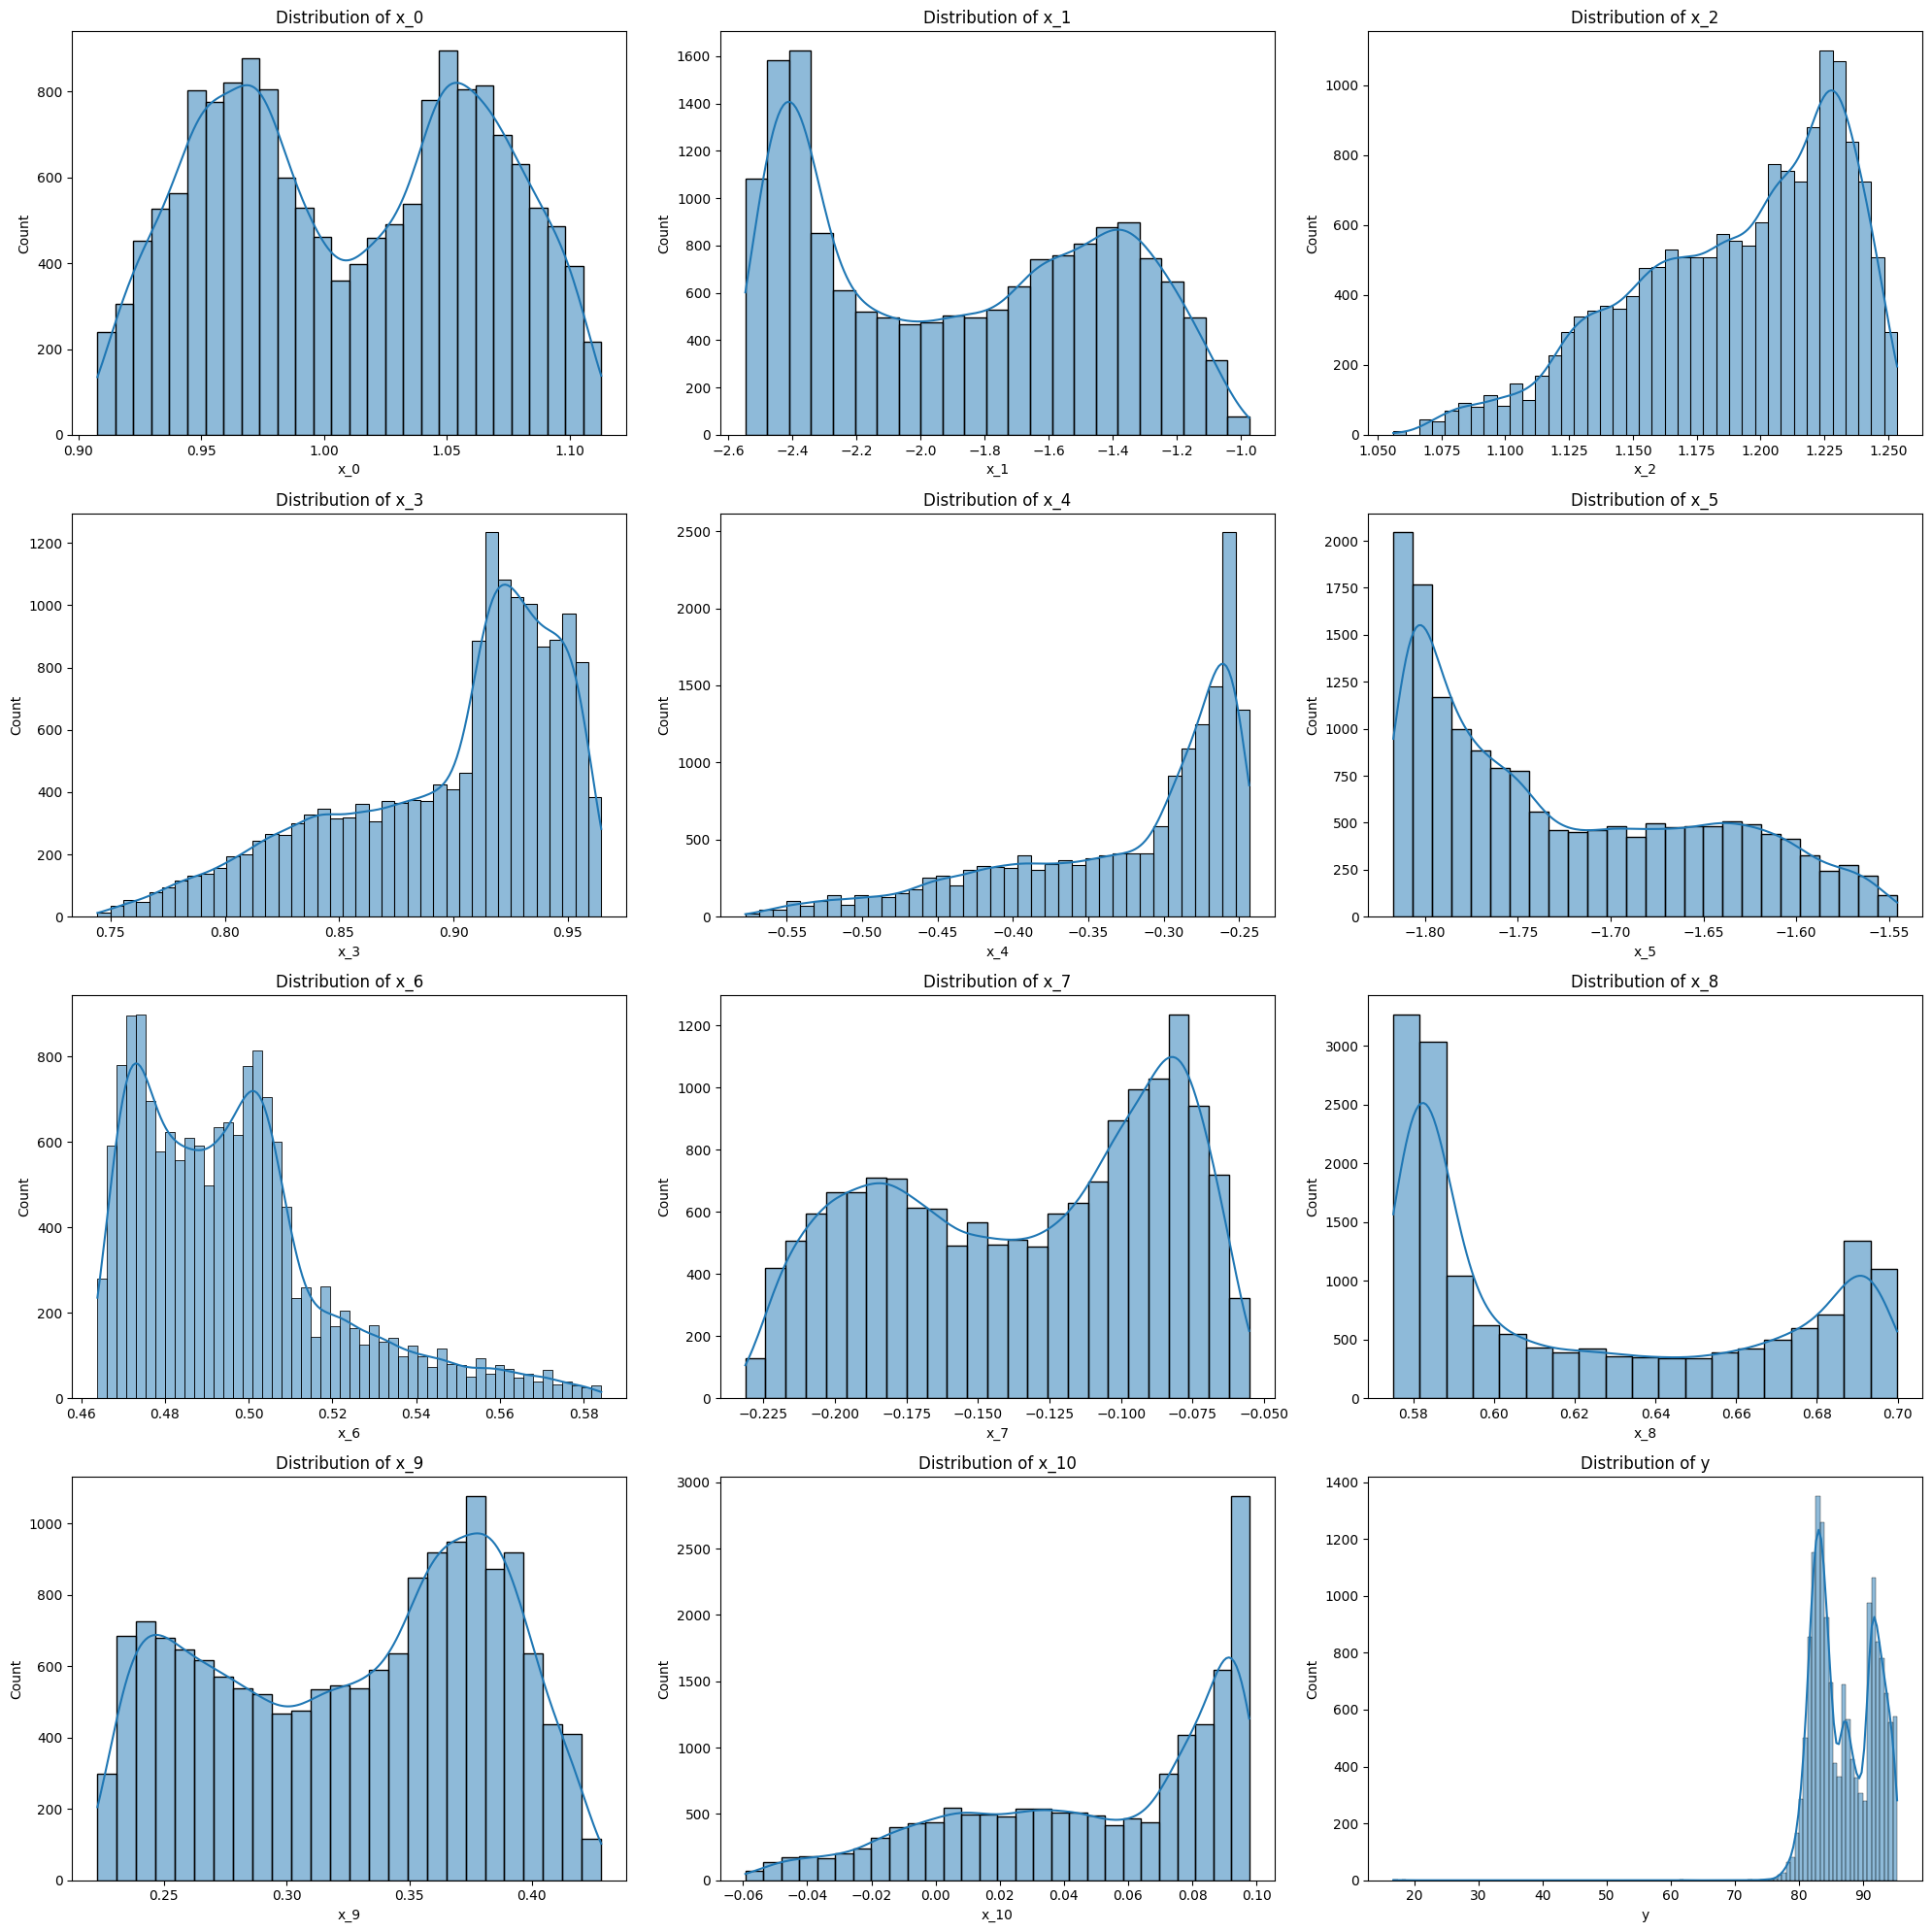

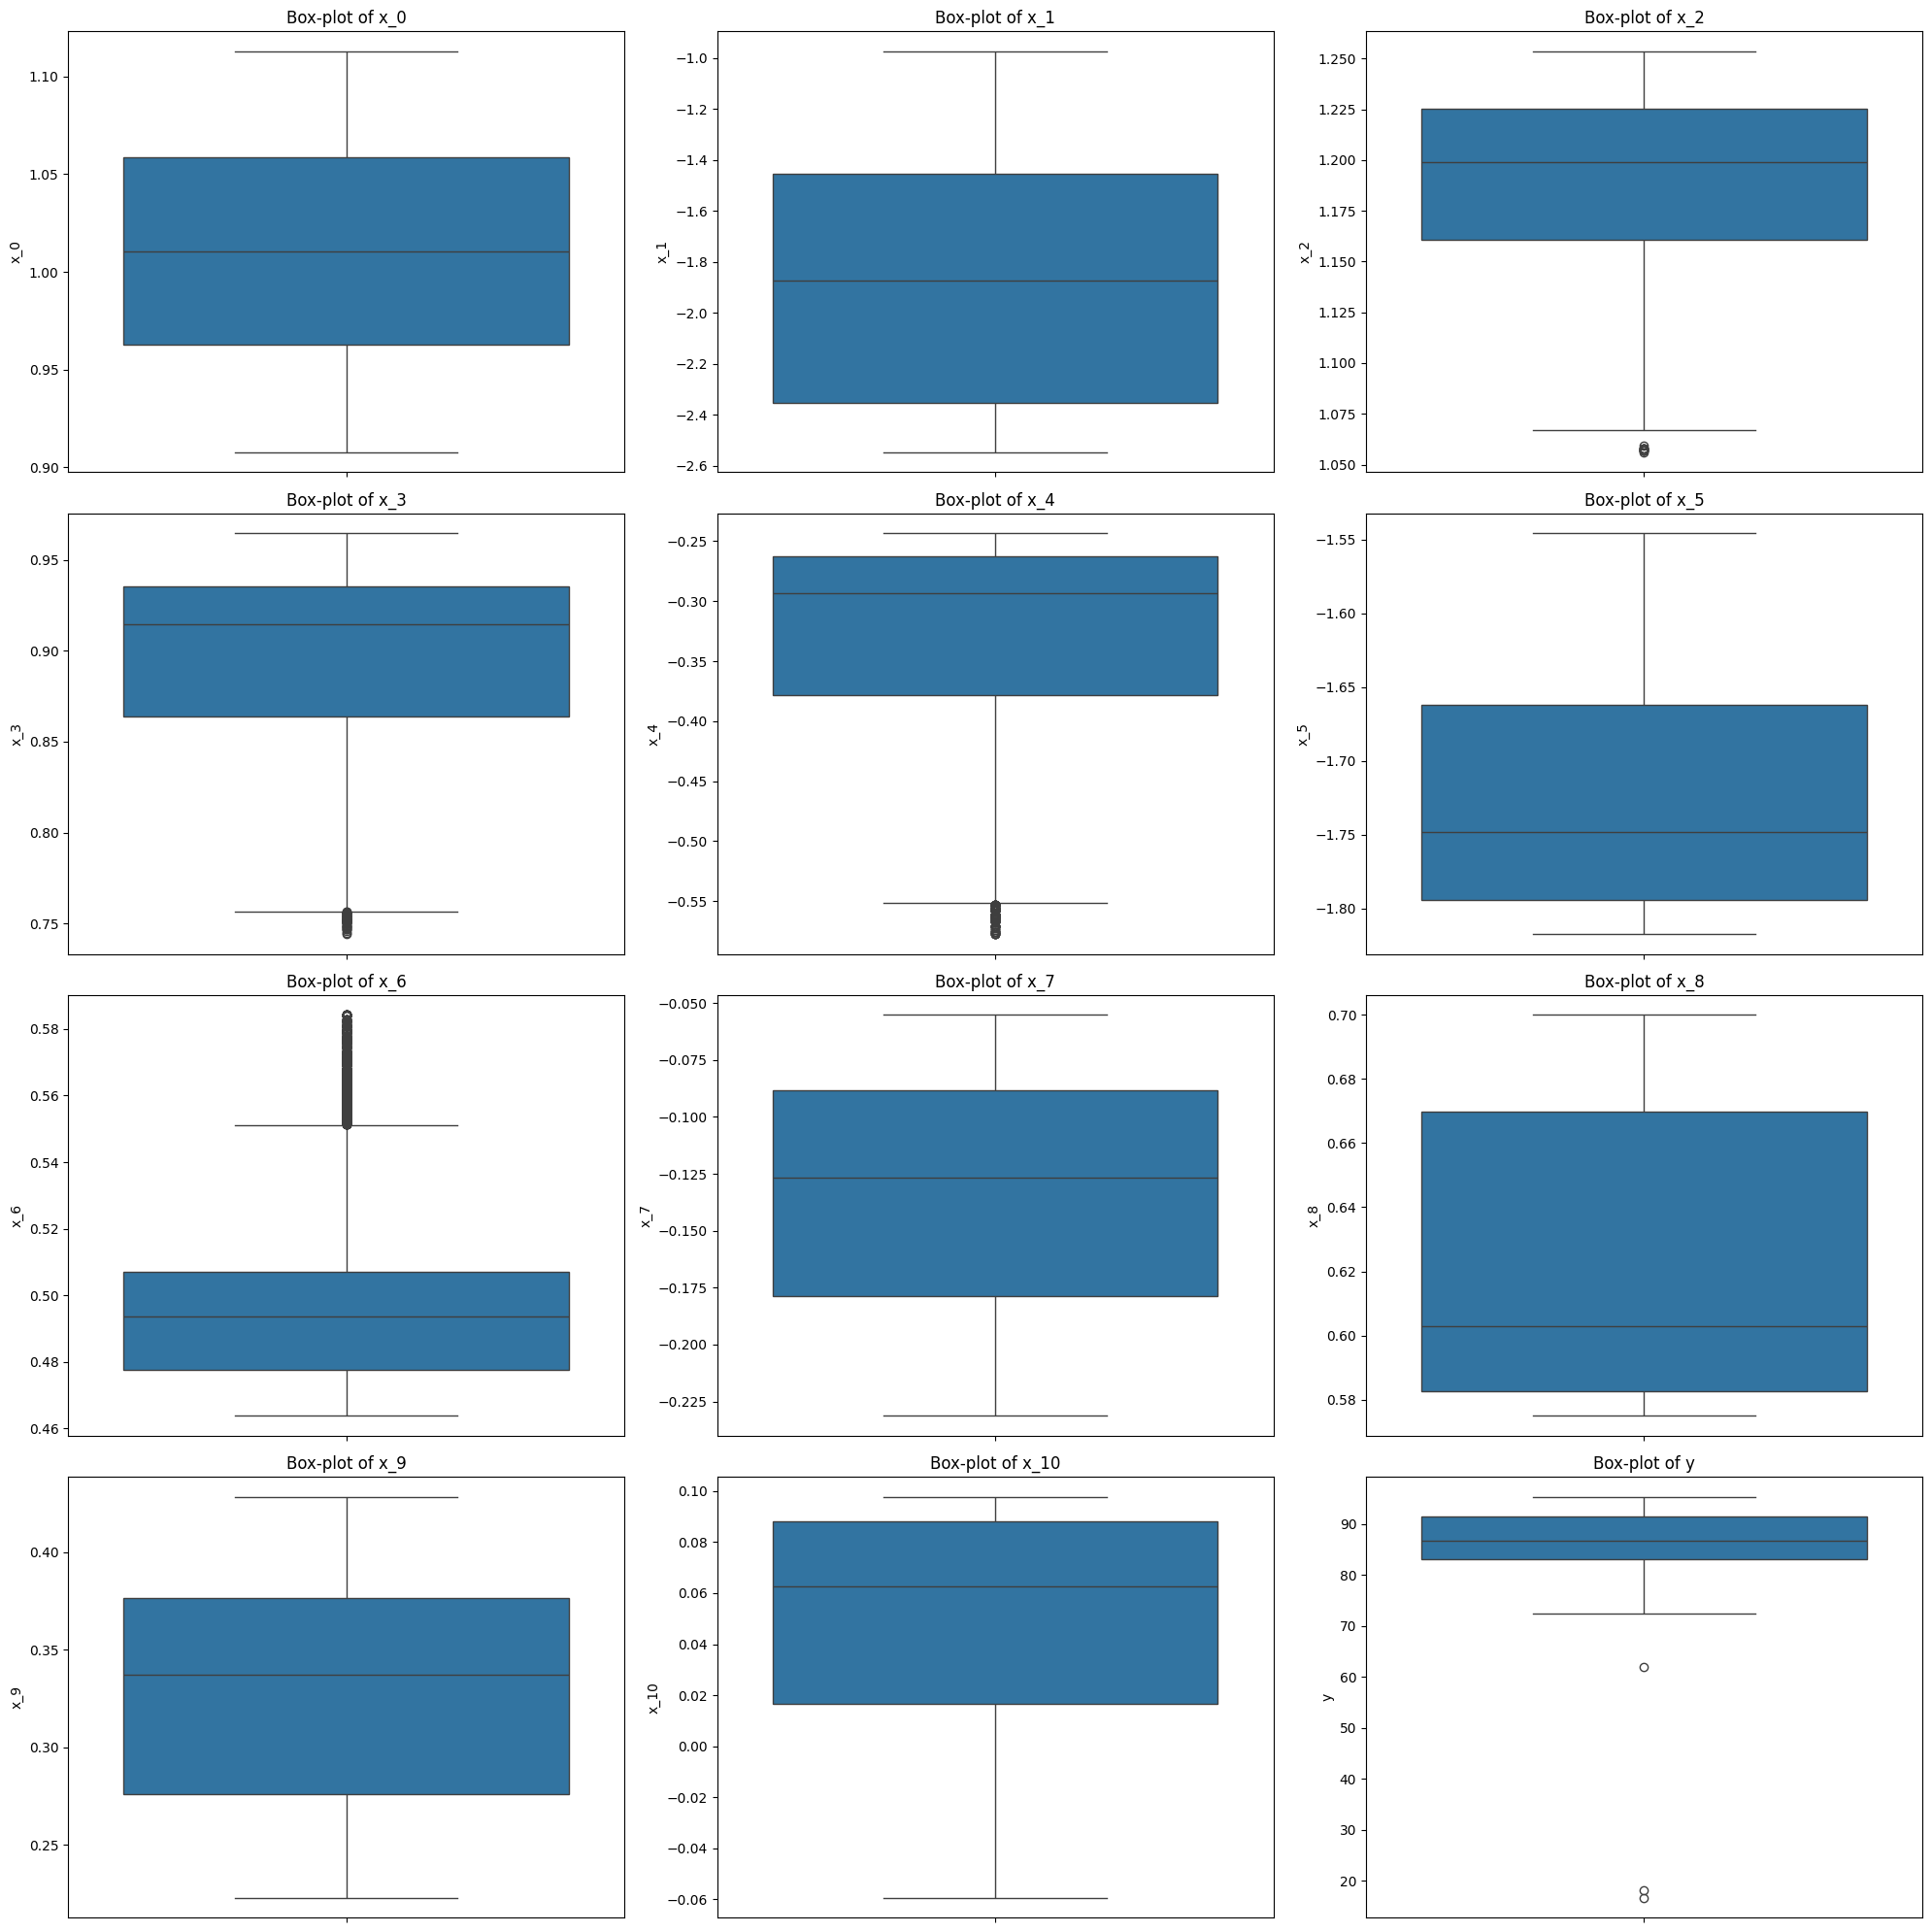

In [109]:
# create histograms for each variables
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel() #  Converts a two-dimensional array to a one-dimensional array

for i, col in enumerate(train):
    sns.histplot(train[col], ax= axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
  
# create box-plots for each variable
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel()

for i, col in enumerate(train):
    sns.boxplot(y=train[col], ax= axes[i])
    axes[i].set_title(f'Box-plot of {col}')
    
plt.tight_layout()
plt.show()

NameError: name 'filtered_df' is not defined

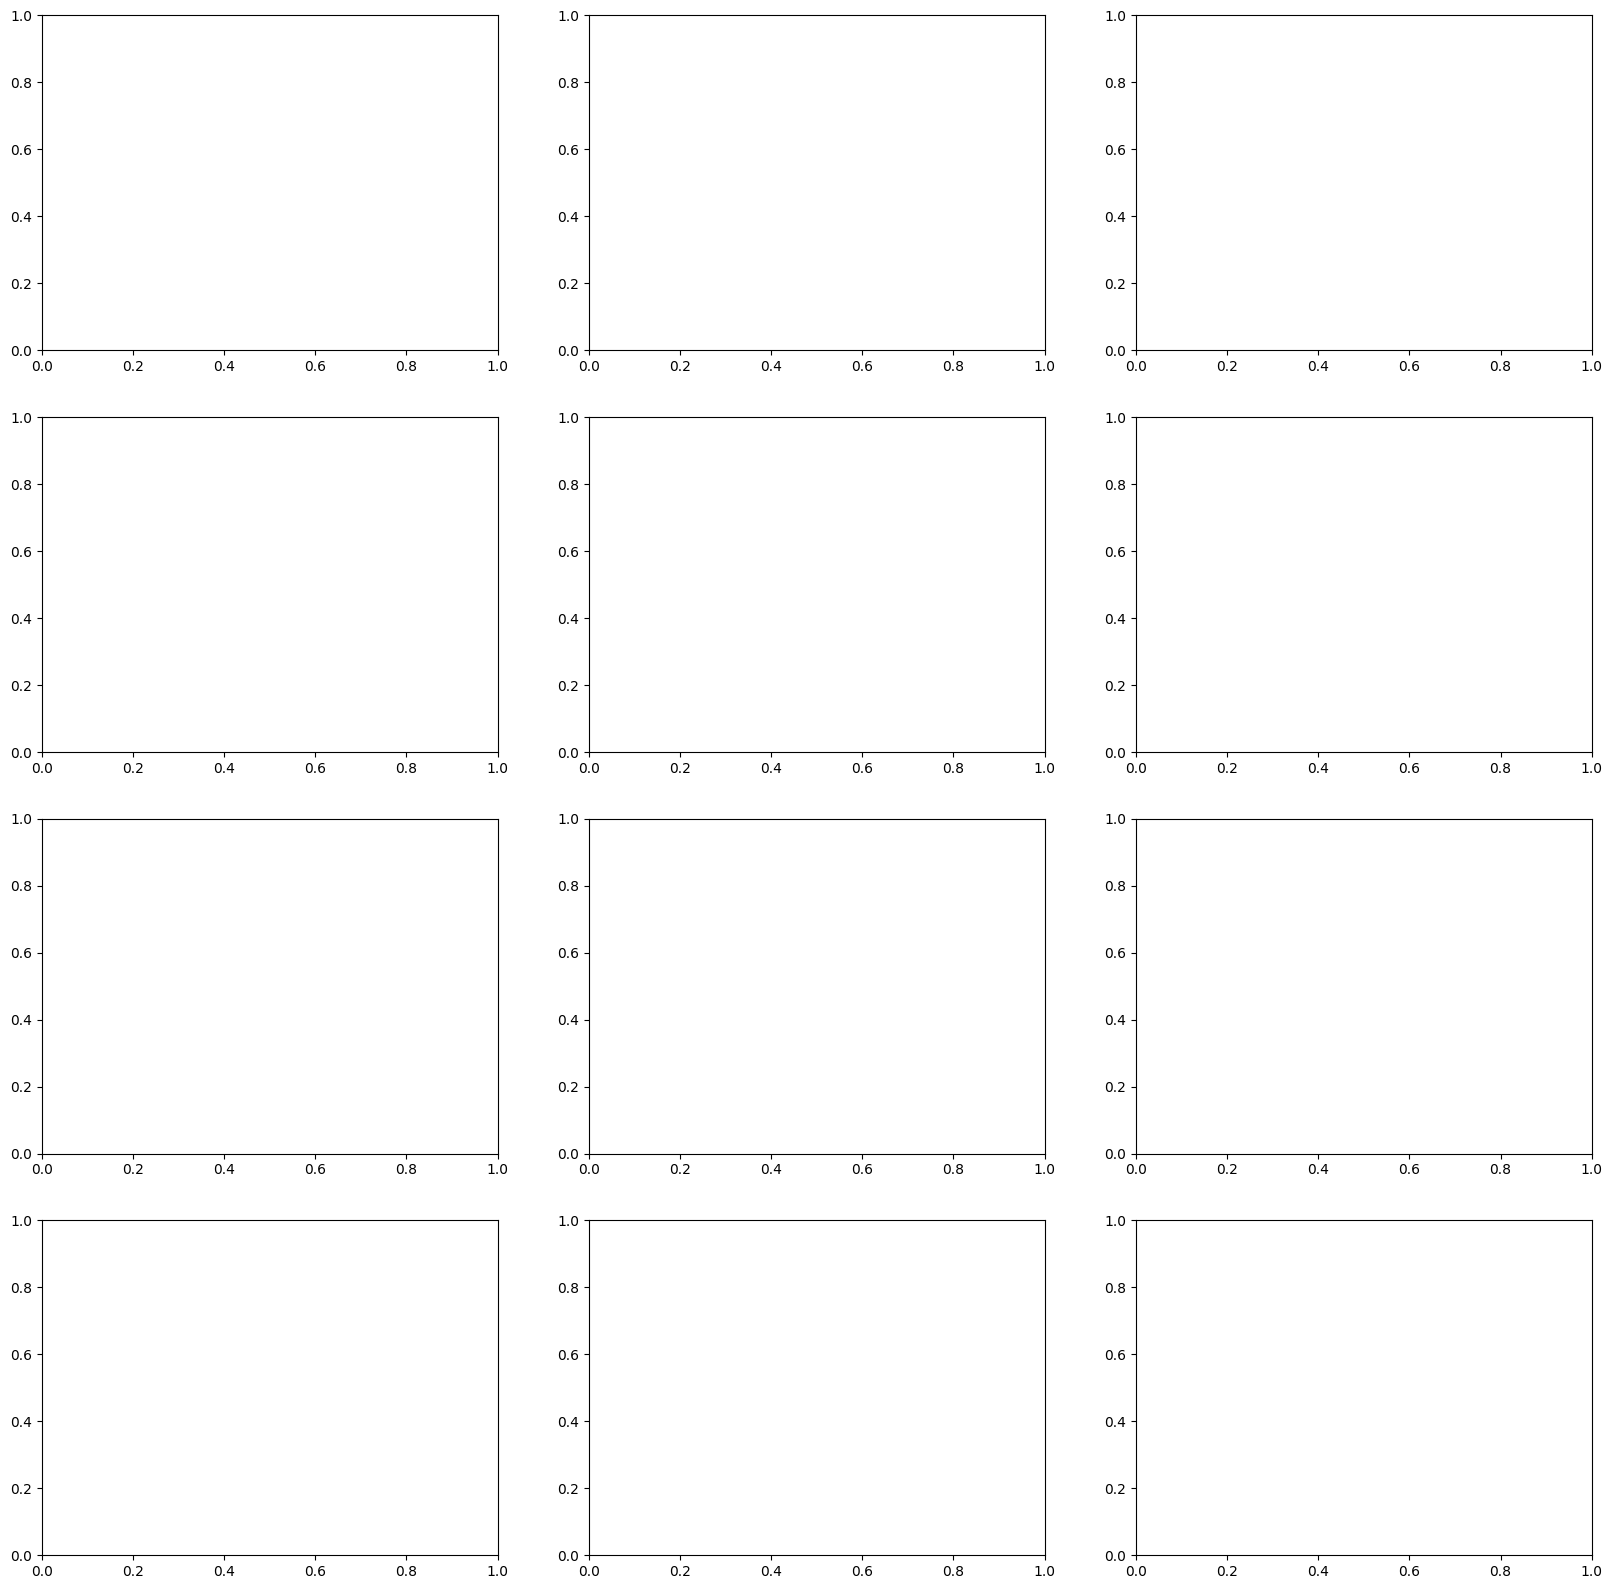

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is the DataFrame where 'y' is in the upper 25 percent

# Create histograms for each variable in filtered_df
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()  # Converts a two-dimensional array to a one-dimensional array

for i, col in enumerate(filtered_df.columns):
    sns.histplot(filtered_df[col], ax=axes[i], kde=True, bins=30)  # Adjust number of bins as needed
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Create box-plots for each variable in filtered_df
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(filtered_df.columns):
    sns.boxplot(y=filtered_df[col], ax=axes[i])
    axes[i].set_title(f'Box-plot of {col}')
    
plt.tight_layout()
plt.show()


## 3. 속성 간의 관계 분석 

X와 y의 상관 관계
x_10   -0.716420
x_8    -0.707139
x_0    -0.620384
x_4    -0.600099
x_6    -0.013633
x_2     0.118969
x_3     0.582873
x_5     0.609798
x_9     0.730894
x_7     0.733974
x_1     0.749408
y       1.000000
Name: y, dtype: float64


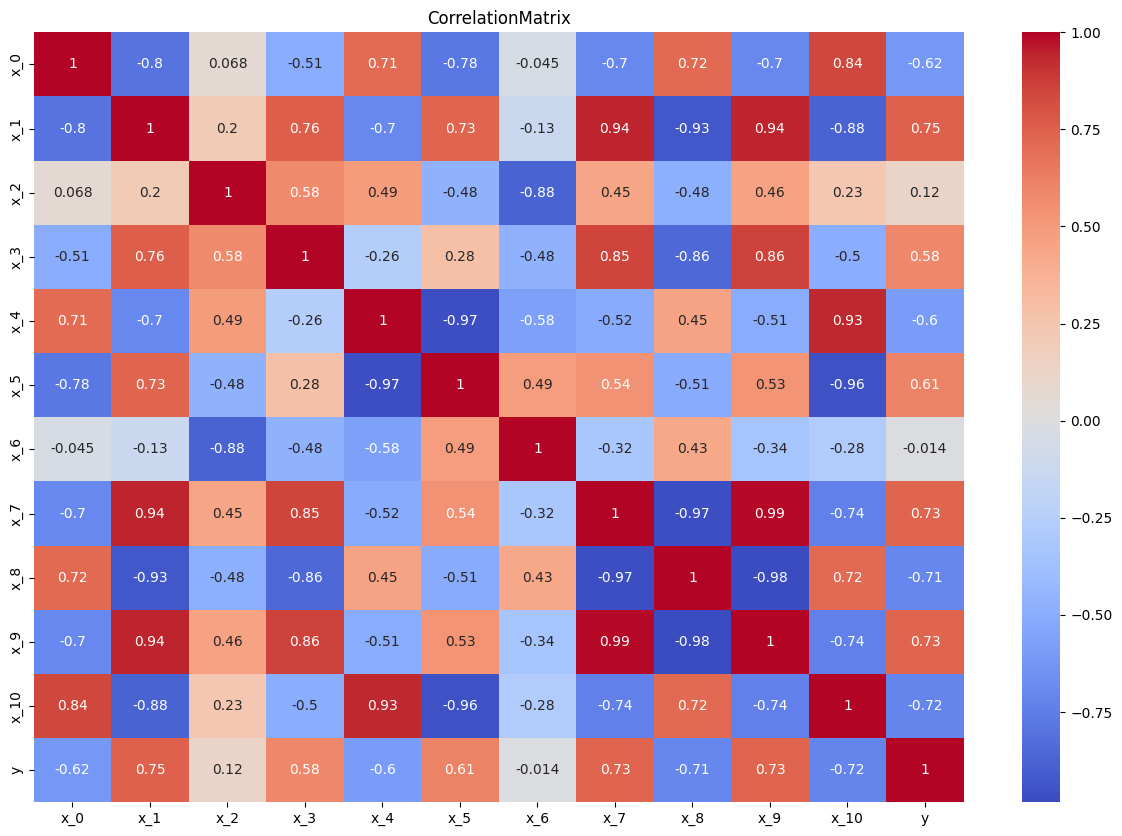

KeyboardInterrupt: 

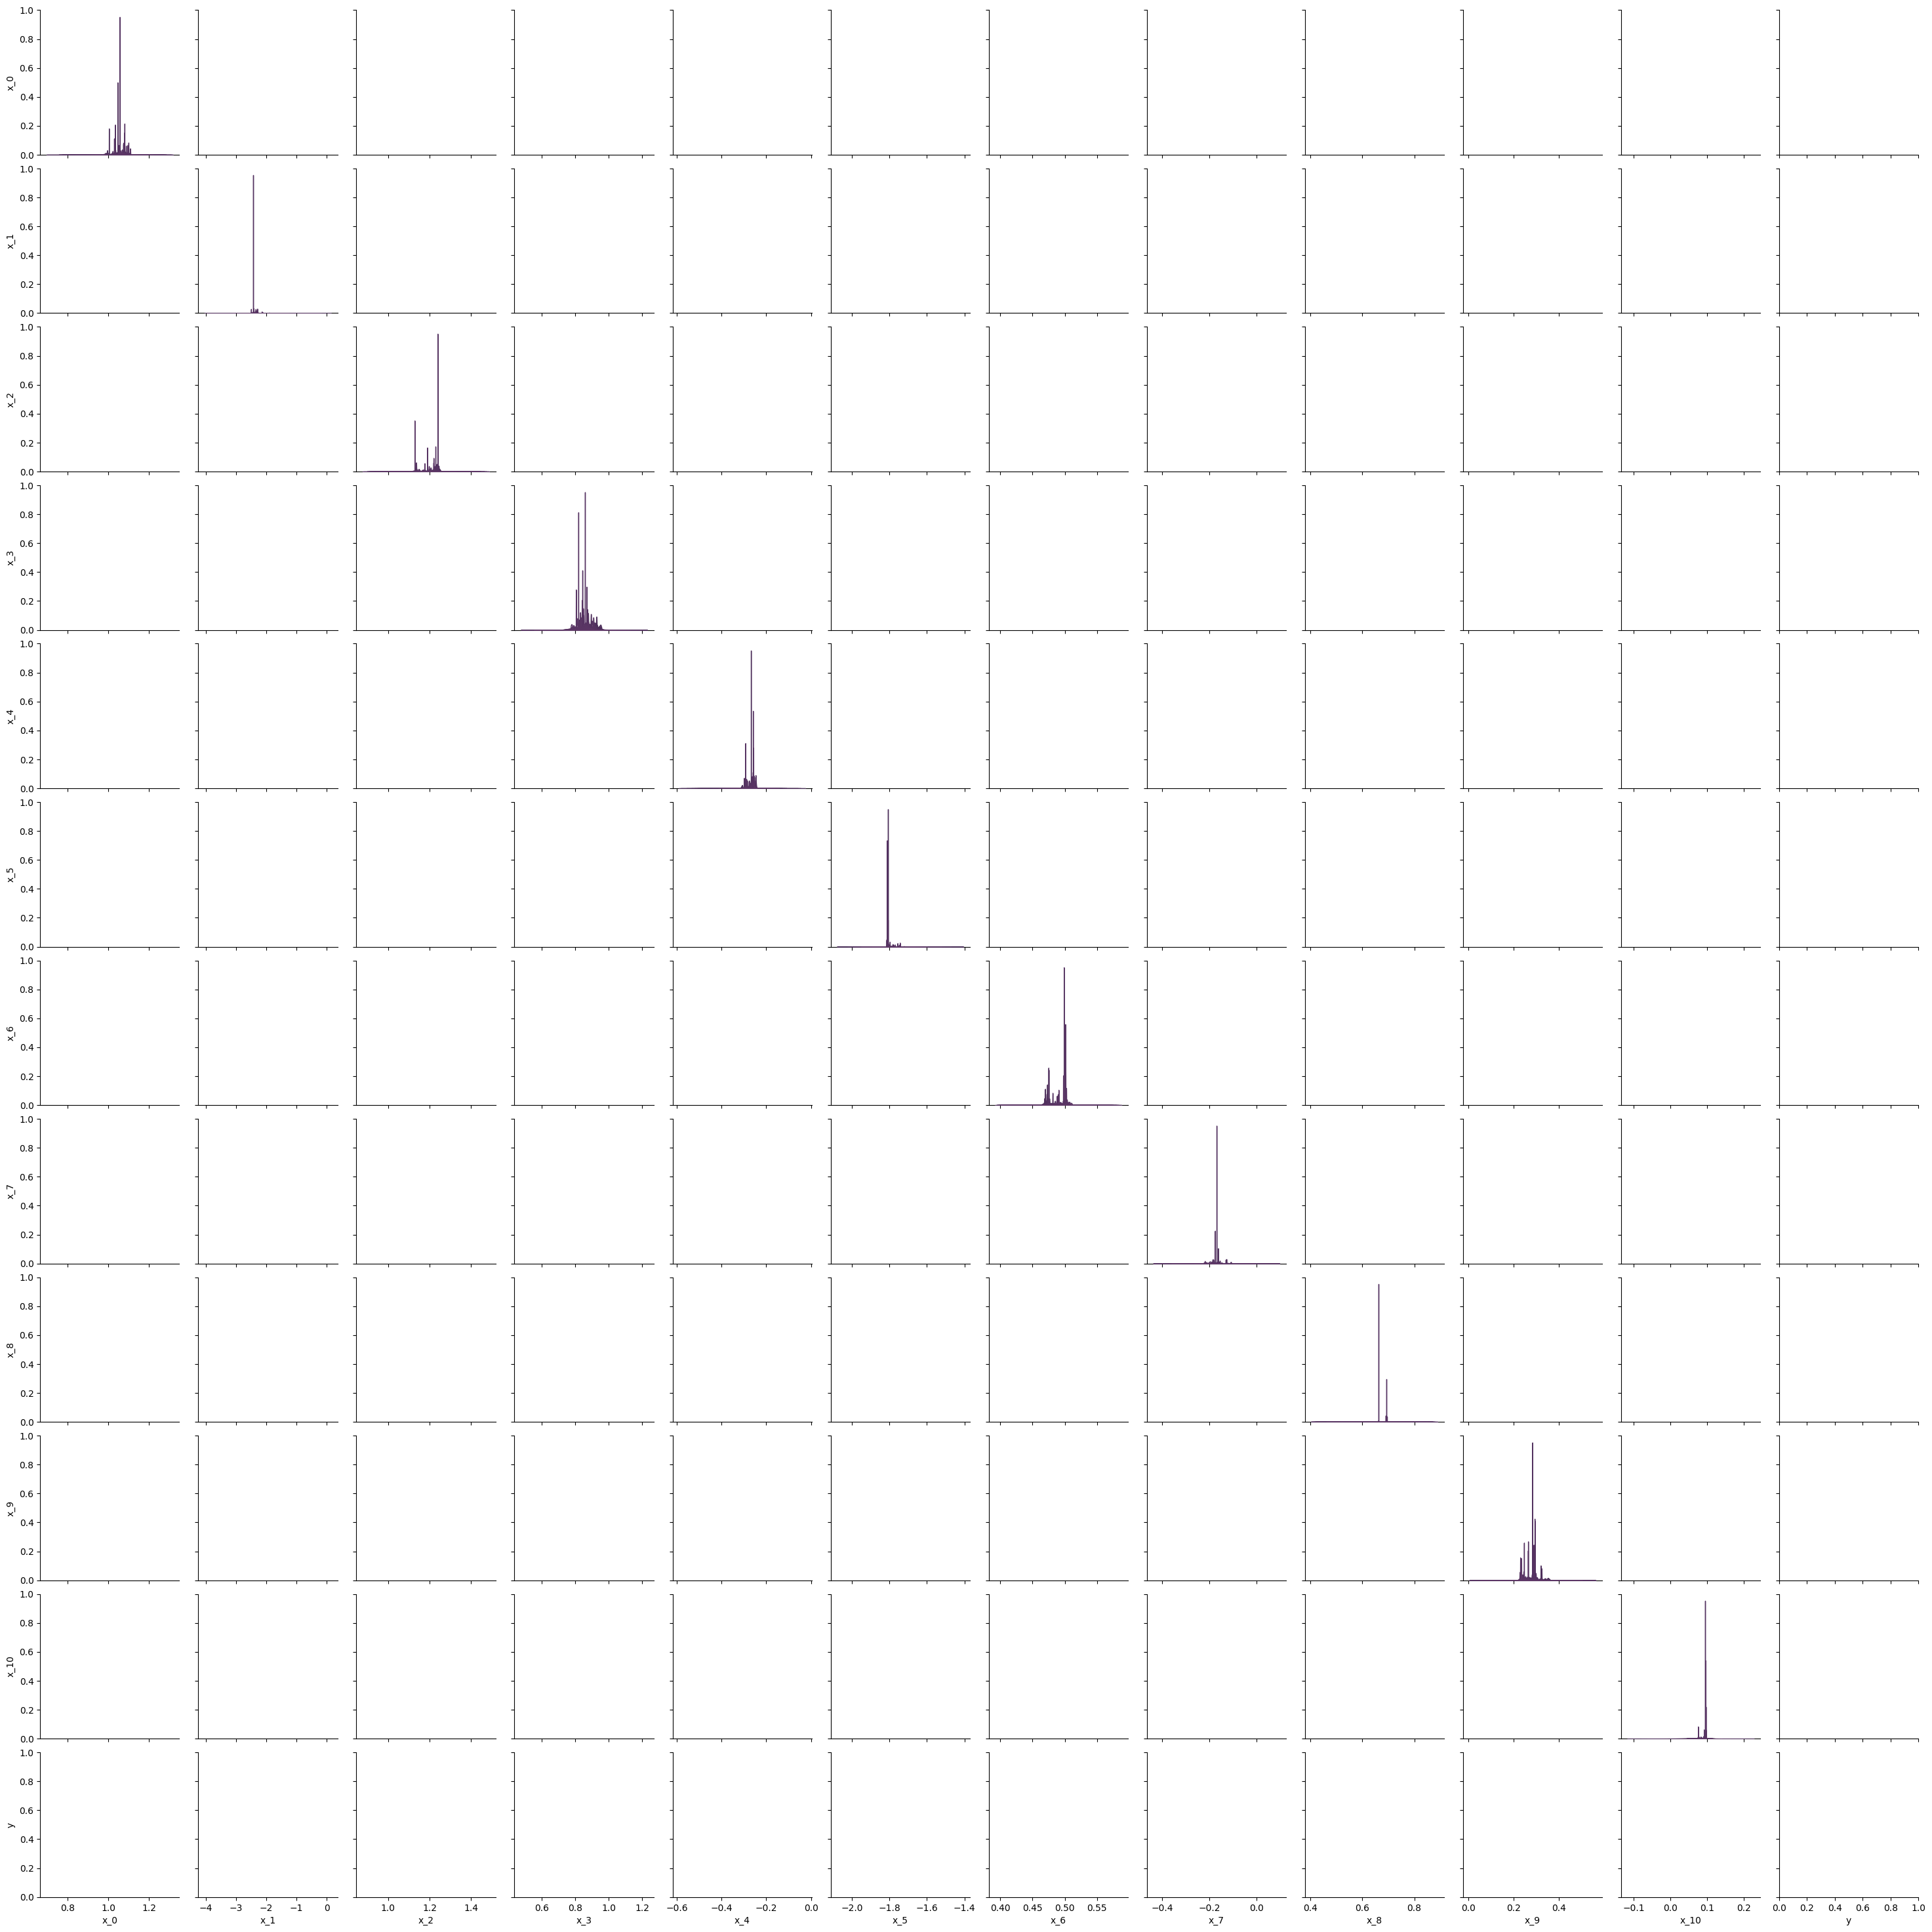

In [ ]:
# calculate the correlation matrix
corr_matrix = train.corr()
print('X와 y의 상관 관계')
print(corr_matrix['y'].sort_values(ascending=True))

# visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('CorrelationMatrix')
plt.show()

# pairplot to visualize scatter plots betwwen 'y' and other variables
sns.pairplot(train,vars=train.columns, diag_kind='kde', kind='scatter', hue='y')
plt.show()